In [1]:
# Inspect the input data

from utils import plot_loss, encoder_files_to_tensors, normalize_params
from utils import sample_files
import time
import glob
import tensorflow as tf
from tensorflow import keras
import yaml
import os
import numpy as np
from datetime import datetime
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl


2023-03-24 09:37:26.624717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 09:37:26.868467: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-24 09:37:26.905705: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kiliakis/install/anaconda3/lib:/home/kiliakis/install/lib
2023-03-24 09:37:26

In [2]:
# Initialize parameters
# data_dir = '/eos/kiliakis/tomo_data/datasets'
# data_dir = './tomo_data/datasets'
data_dir = './tomo_data/datasets_encoder_TF_03-03-23'

# Data specific
IMG_OUTPUT_SIZE = 128
latent_dim = 7  # 6 + the new VrfSPS

# Keep only a small percentage of the entire dataset
# for faster testing.
dataset_keep_percent = 0.01

# Training: 338900
# Validation: 59136 (338901 - 399036)
# Testing: 71526 (398037 - 469562)


In [3]:

# Initialize train/ test / validation paths
ML_dir = os.path.join(data_dir, 'ML_data')
TRAINING_PATH = os.path.join(ML_dir, 'TRAINING')
assert os.path.exists(TRAINING_PATH)

VALIDATION_PATH = os.path.join(ML_dir, 'VALIDATION')
assert os.path.exists(VALIDATION_PATH)



In [4]:
file_names = sample_files(VALIDATION_PATH, dataset_keep_percent, keep_every=1)
file_name = file_names[0]

In [6]:

x_valid, y_valid = encoder_files_to_tensors(
    file_names, normalization='minmax',
    img_normalize='off')


2023-03-24 09:38:38.624640: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kiliakis/install/anaconda3/lib:/home/kiliakis/install/lib
2023-03-24 09:38:38.624903: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-24 09:38:38.624938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sy153): /proc/driver/nvidia/version does not exist
2023-03-24 09:38:38.626410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appr

(14, 128, 128, 1)


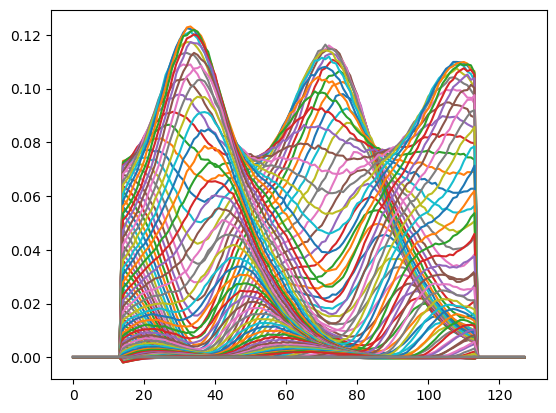

In [23]:
fig = plt.figure()
# plt.imshow(x_valid[0])
print(x_valid.shape)
for i in range(128):
    plt.plot(x_valid[5][:][i][:])
# print(x_valid[0])
# plt.plot(x_valid[0][])

In [ ]:
eos = '/eos/user/k/kiliakis/'
simulations_dir = os.path.join(eos, 'tomo_data/results_tomo')
all_sim_dirs = os.listdir(simulations_dir)
fn = all_sim_dirs[0]
print(fn)
# paramsDict, PS_imgs, sel_turns, E_img, T_img, PS_img_dec = \
#     extract_data_Fromfolder(fn, simulations_dir, IMG_OUTPUT_SIZE, zeropad,
#                             start_turn, skipturns, version=4)


In [25]:
from utils import read_pk
turn_num, T_img, PS, fn, params_dict = read_pk(file_name)
print(np.array2string(T_img, threshold=100000, separator=',', precision=2, max_line_width=10000))
# print(T_img.dtype)
# print(np.max(T_img))


[[ 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+0

In [ ]:
import pickle as pk
raw = tf.io.read_file(file_name)
image = tf.io.decode_raw(raw, tf.uint8)
print(image)
data = pk.loads(image)
print(type(T_img))
x_train, y_train = encoder_files_to_tensors(file_names, normalize='minmax')
print(x_train.dtype)

In [ ]:
import re
import h5py as hp

IMG_OUTPUT_SIZE = 128
zeropad = 14
skipturns = 3
start_turn = 1

pattern_string = 'phEr(?P<phEr>.+)_enEr(?P<enEr>.+)_bl(?P<bl>.+)_int(?P<int>.+)_Vrf(?P<Vrf>.+)_mu(?P<mu>.+)_VrfSPS(?P<VrfSPS>.+)'
paramsDict = {k: float(v) for k, v in re.match(
    pattern_string, fn).groupdict().items()}
E_img = np.zeros((IMG_OUTPUT_SIZE, IMG_OUTPUT_SIZE))
T_img = np.zeros((IMG_OUTPUT_SIZE, IMG_OUTPUT_SIZE))
sf = hp.File(os.path.join(os.path.join(
    simulations_dir, fn), 'saved_result.hdf5'), 'r')

BunchProfiles = np.array(sf['bunchProfiles'])
EnergyProfiles = np.array(sf['energyProfiles'])
columns = sf['columns']
phaseSpace_density_array = np.array(sf['phaseSpace_density_array'])

# with hp.File(os.path.join(os.path.join(simulations_dir, fn), 'saved_result.hdf5'), 'r') as sf:
#     print(sf['columns'][0][3])

    # for k in sf.keys():
    #     print(k, sf[k].shape)
    # BunchProfiles = np.array(sf['bunchProfiles']) / \
    #     sf['columns'][0][3]*paramsDict['int']
    # EnergyProfiles = np.array(
    #     sf['energyProfiles'])/sf['columns'][0][3]*paramsDict['int']
    # phaseSpace_density_array = np.array(sf['phaseSpace_density_array'])
    # PS_imgs = np.zeros((IMG_OUTPUT_SIZE, IMG_OUTPUT_SIZE,
    #                     phaseSpace_density_array.shape[1]))


In [ ]:
from utils import extract_data_Fromfolder
paramsDict, PS_imgs, sel_turns, E_img, T_img, PS_img_dec = \
    extract_data_Fromfolder(fn, simulations_dir, IMG_OUTPUT_SIZE, zeropad,
                            start_turn, skipturns, version=4)
T_normFactor = np.max(T_img)
T_min = np.min(T_img)
# T_img = T_img / T_normFactor
# for 8 bit I need to map to 0-255
T_img_8bit = np.interp(T_img, [T_min, T_normFactor], [0, 255])
# for 16 bit I need to map to 0-65535
T_img_16bit = np.interp(T_img, [T_min, T_normFactor], [0, 65535])

T_img_8bit = T_img_8bit.astype(np.uint8)
T_img_16bit = T_img_16bit.astype(np.uint16)

# print(np.max(T_img), np.mean(T_img))
# print(np.max(T_img_8bit), np.mean(T_img_8bit))
# print(np.max(T_img_16bit), np.mean(T_img_16bit))


In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
axes = np.ravel(axes)
ax = axes[0]
ax.set_xticks([])
ax.set_yticks([])
# show the image
ax.imshow(T_img[14:-14, 14:-50], cmap='jet')
# Set the label
title = 'T_img'
ax.set_title(f'{title}')

ax = axes[1]
ax.set_xticks([])
ax.set_yticks([])
# show the image
ax.imshow(T_img_8bit[14:-14, 14:-50], cmap='jet')
# Set the label
title = 'T_img_8bit'
ax.set_title(f'{title}')

ax = axes[2]
ax.set_xticks([])
ax.set_yticks([])
# show the image
ax.imshow(T_img_16bit, cmap='jet')
# Set the label
title = 'T_img_16bit'
ax.set_title(f'{title}')




In [ ]:
# Create the datasets
# First the training data
file_names = sample_files(TRAINING_PATH, dataset_keep_percent, keep_every=51)
# print(sorted(file_names)[:10])

# read input, divide in features/ label, create tensors
x_train, y_train = encoder_files_to_tensors(file_names, normalize=False)

# # Then the validation data
# files = glob.glob(VALIDATION_PATH + '/*.pk')
# files = files[:int(len(files) * dataset_keep_percent)]

# # Shuffle them
# np.random.shuffle(files)
# # read input, divide in features/ label, create tensors
# x_valid, y_valid = encoder_files_to_tensors(files)


In [ ]:
%matplotlib inline
# plot some of the outputs

nrows = 2
# Get nrows * nrows random images
# sample = np.random.choice(np.arange(len(x_train)),
#                           size=nrows * nrows, replace=False)

# samples_X = tf.gather(x_train, sample)
# samples_y = tf.gather(y_train, sample)

samples_X = x_train[:nrows*nrows]
samples_y = y_train[:nrows*nrows]


# Create 3x3 grid of figures
fig, axes = plt.subplots(ncols=nrows, nrows=nrows, figsize=(12, 12))
axes = np.ravel(axes)
for i in range(len(axes)):
    ax = axes[i]
    ax.set_xticks([])
    ax.set_yticks([])
    # show the image
    ax.imshow(samples_X[i], cmap='jet')
    # Set the label
    title = ','.join([f'{num:.1f}' for num in samples_y[i]])
    ax.set_title(f'{title}')


In [ ]:
%matplotlib inline
nrows = 1
# Get nrows * nrows random images
sample = np.random.choice(np.arange(len(x_train)),
                          size=nrows * nrows, replace=False)

samples_X = tf.gather(x_train, sample)
samples_y = tf.gather(y_train, sample)

# Create 3x3 grid of figures
fig, axes = plt.subplots(ncols=nrows, nrows=nrows, figsize=(8, 8))
axes = np.ravel(axes)
for i in range(len(axes)):
    ax = axes[i]
    ax.set_xticks([])
    ax.set_yticks([])
    # show the image
    ax.imshow(samples_X[i][14:-14, 14:-14], cmap='jet')
    # Set the label
    # title = ','.join([f'{num:.1f}' for num in samples_y[i]])
    print(samples_y[i])
    # ax.set_title(f'{title}')


In [ ]:
mean_x_train = x_train.numpy().mean(axis=0)
cropped_mean = mean_x_train[14:-14, 14:-14]
# Create 3x3 grid of figures
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
ax.set_xticks([])
ax.set_yticks([])
# show the image
ax.imshow(cropped_mean, cmap='jet')
# Set the label
ax.set_title(f'Mean of all x_train')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# y_train = y_train.numpy()
std_scaler = StandardScaler().fit(y_train)
min_max_scaler = MinMaxScaler().fit(y_train)



In [ ]:

print('Mean: ', std_scaler.mean_)
print('STD: ', std_scaler.scale_)
print('Min: ', min_max_scaler.data_min_)
print('Max: ', min_max_scaler.data_max_)

# print(tf.reduce_mean(y_train, 0))
# print(tf.math.reduce_std(y_train, 0))


In [ ]:
# min_max_norm_data = min_max_scaler.transform(y_train)
# std_norm_data = std_scaler.transform(y_train)
min_max_norm_data = normalize_params(
    y_train[:, 0], y_train[:, 1], y_train[:, 2],
    y_train[:, 3], y_train[:, 4], y_train[:, 5], 
    y_train[:, 6], normalization='minmax')

std_norm_data = normalize_params(
    y_train[:, 0], y_train[:, 1], y_train[:, 2],
    y_train[:, 3], y_train[:, 4], y_train[:, 5], 
    y_train[:, 6], normalization='std')

default_norm_data = normalize_params(
    y_train[:, 0], y_train[:, 1], y_train[:, 2],
    y_train[:, 3], y_train[:, 4], y_train[:, 5], 
    y_train[:, 6], normalization='default')


# Now plot the data distribution
var_names = ['phase_error', 'energy_error',
             'bunch_length', 'intensity', 'V_rf', 'mu', 'Vrf_SPS']
fig, axes = plt.subplots(ncols=4, nrows=len(var_names), sharex=False,
                         sharey=True, figsize=(16, 16))
for i, name in enumerate(var_names):
    hist, edges = np.histogram(min_max_norm_data[i], bins=20, density=False)
    hist = hist / len(y_train[:, i])
    print(name+'-min_max', edges)
    ax = axes[i][0]
    plt.sca(ax)
    plt.bar(np.arange(len(hist)), hist, width=0.8)
    plt.title(name + '-min_max')
    # edges = [f'{e:.4f}' for e in edges]
    plt.xticks(np.arange(len(hist))[[0,-1]], edges[[0,-1]])
    plt.xlabel('Bin')
    plt.ylabel('Density')
    plt.tight_layout()

    hist, edges = np.histogram(std_norm_data[i], bins=20, density=False)
    hist = hist / len(y_train[:, i])
    print(name+'-std', edges)
    ax = axes[i][1]
    plt.sca(ax)
    plt.bar(np.arange(len(hist)), hist, width=0.8)
    plt.title(name + '-std')
    # edges = [f'{e:.4f}' for e in edges]
    plt.xticks(np.arange(len(hist))[[0,-1]], edges[[0,-1]])
    plt.xlabel('Bin')
    plt.ylabel('Density')
    plt.tight_layout()

    hist, edges = np.histogram(default_norm_data[i], bins=20, density=False)
    hist = hist / len(y_train[:, i])
    print(name+'-def', edges)
    ax = axes[i][2]
    plt.sca(ax)
    plt.bar(np.arange(len(hist)), hist, width=0.8)
    plt.title(name + '-def')
    # edges = [f'{e:.4f}' for e in edges]
    plt.xticks(np.arange(len(hist))[[0,-1]], edges[[0,-1]])
    plt.xlabel('Bin')
    plt.ylabel('Density')
    plt.tight_layout()

    hist, edges = np.histogram(y_train[:, i], bins=20, density=False)
    hist = hist / len(y_train[:, i])
    print(name+'-unorm', edges)
    ax = axes[i][3]
    plt.sca(ax)
    plt.bar(np.arange(len(hist)), hist, width=0.8)
    plt.title(name + '-unorm')
    # edges = [f'{e:.4f}' for e in edges]
    plt.xticks(np.arange(len(hist))[[0,-1]], edges[[0,-1]])
    plt.xlabel('Bin')
    plt.ylabel('Density')
    plt.tight_layout()


In [ ]:
%matplotlib inline
# plot some of the outputs

nrows = 3
# Get nrows * nrows random images
sample = np.random.choice(np.arange(len(x_train)),
                          size=nrows * nrows, replace=False)

samples_X = tf.gather(x_train, sample)
samples_y = tf.gather(y_train, sample)

# Create 3x3 grid of figures
fig, axes = plt.subplots(ncols=nrows, nrows=nrows, figsize=(12, 12))
axes = np.ravel(axes)
for i in range(len(axes)):
    ax = axes[i]
    ax.set_xticks([])
    ax.set_yticks([])
    # show the image
    ax.imshow(samples_X[i, 14:-14, 14:-14], cmap='jet')
    # Set the label
    title = ','.join([f'{num:.1f}' for num in samples_y[i]])
    ax.set_title(f'{title}')


In [ ]:
## For the decoder part
from utils import decoder_files_to_tensors

# read input, divide in features/ label, create tensors
x_train, y_train = decoder_files_to_tensors(file_names)


In [ ]:
%matplotlib inline
# plot some of the outputs

nrows = 1
# Get nrows * nrows random images
sample = np.random.choice(np.arange(len(y_train)),
                          size=nrows, replace=False)

samples_real = tf.gather(y_train, sample)

# Create 3x3 grid of figures
fig, axes = plt.subplots(ncols=nrows, nrows=nrows, figsize=(nrows*8, nrows*8))
axes = np.ravel(axes)
for i in range(nrows):
    ax = axes[i]
    plt.sca(ax)
    ax.set_xticks([])
    ax.set_yticks([])
    # show the image
    ax.imshow(samples_real[i][14:-14, 14:-14], cmap='jet')
    # Set the label
    # title = ','.join([f'{num:.1f}' for num in samples_X[i]])
    ax.set_title(f'True')
    plt.tight_layout()


In [ ]:
%matplotlib inline
# plot some of the outputs

nrows = 5
# Get nrows * nrows random images
sample = np.random.choice(np.arange(len(y_test)),
                          size=nrows, replace=False)

samples_real = y_test[sample]
samples_pred = test_pred[sample]

# Create 3x3 grid of figures
fig, axes = plt.subplots(ncols=3, nrows=nrows, figsize=(12, 20))
# axes = np.ravel(axes)
for i in range(nrows):
    ax = axes[i][0]
    plt.sca(ax)
    ax.set_xticks([])
    ax.set_yticks([])
    # show the image
    ax.imshow(samples_real[i]+1, cmap='jet', vmin=0, vmax=2)
    # Set the label
    # title = ','.join([f'{num:.1f}' for num in samples_X[i]])
    ax.set_title(f'True')
    plt.tight_layout()

    ax = axes[i][1]
    plt.sca(ax)
    ax.set_xticks([])
    ax.set_yticks([])
    # show the image
    ax.imshow(samples_pred[i]+1, cmap='jet', vmin=0, vmax=2)
    # Set the label
    # title = ','.join([f'{num:.1f}' for num in samples_X[i]])
    ax.set_title(f'Predicted')
    plt.tight_layout()

    ax = axes[i][2]
    plt.sca(ax)
    ax.set_xticks([])
    ax.set_yticks([])
    # show the image
    plt.imshow(np.abs(samples_real[i] -
                      samples_pred[i]), cmap='jet', vmin=0, vmax=2,
               aspect='auto')
    plt.colorbar()
    # Set the label
    # title = ','.join([f'{num:.1f}' for num in samples_X[i]])
    ax.set_title(f'Diff')
    plt.tight_layout()
